In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.ticker as plticker
import matplotlib.font_manager

In [2]:
def is_pareto_efficient(costs):
    is_efficient = np.ones(costs.shape[0], dtype = bool)
    for i, c in enumerate(costs):
        is_efficient[i] = np.all(np.any(costs[:i]>c, axis=1)) and np.all(np.any(costs[i+1:]>c, axis=1))
    return is_efficient

In [3]:
with open(f"boxplot-1.2.csv", 'r') as violations_file:
    df = pd.read_csv(violations_file, delimiter = ',')

rename = {'random_r_2_c': 'Contention-agnostic',
          'oracle_r_2_c': 'Oracle Heatmap',
          'oracle_p_2_c': 'Pred. Heatmap',
          'delphi_r_2_c': 'Delphi (Real, Conserv. Cl., Safe Gr.)',
          'delphi_r_3_c': 'Delphi (Real, Moderate Cl., Safe Gr.)',
          'delphi_r_2_r': 'Delphi (Real, Conserv. Cl., Risky Gr.)',
          'delphi_r_3_r': 'Delphi (Real, Moderate Cl., Risky Gr.)',
          'delphi_p_2_c': 'Delphi C.C., S.G.',
          'delphi_p_3_c': 'Delphi M.C., S.G.',
          'delphi_p_2_r': 'Delphi C.C., R.G.',
          'delphi_p_3_r': 'Delphi M.C., R.G.',
          'attackers_r_2_c': 'Attackers (Safe Gr.',
          'attackers_r_2_r': 'Attackers (Risky Gr.)'}
reverse = {'Contention-agnostic': 'random_r_2_c',
          'Oracle Heatmap': 'oracle_r_2_c',
          'Pred. Heatmap': 'oracle_p_2_c',
          'Delphi (Real, Conserv. Cl., Safe Gr.)': 'delphi_r_2_c',
          'Delphi (Real, Moderate Cl., Safe Gr.)': 'delphi_r_3_c',
          'Delphi (Real, Conserv. Cl., Risky Gr.)': 'delphi_r_2_r',
          'Delphi (Real, Moderate Cl., Risky Gr.)': 'delphi_r_3_r',
          'Delphi C.C., S.G.': 'delphi_p_2_c',
          'Delphi M.C., S.G.': 'delphi_p_3_c',
          'Delphi C.C., R.G.': 'delphi_p_2_r',
          'Delphi M.C., R.G.': 'delphi_p_3_r',
          'Attackers (Safe Gr.': 'attackers_r_2_c',
          'Attackers (Risky Gr.)': 'attackers_r_2_r'}

included = ['random_r_2_c', 'oracle_p_2_c', 'delphi_p_2_c', 'delphi_p_2_r', 'delphi_p_3_c', 'delphi_p_3_r']
df = df[df['algo'].isin(included)]
for x in set(list(df['algo'])):
    df['algo'] = df['algo'].replace([x], rename[x])

df.set_index('algo', inplace=True)

In [4]:
bv = df[['bins', 'violations']].values
efficient_points = bv[is_pareto_efficient(bv)]

In [5]:
markers = {'random': {'2': 'X'}, 
           'oracle': {'2': 'o'}, 
           'delphi': {'2': 's', '3': '^'}, 
           'attackers': {'2': {'c': 's', 'r': 'D'}}}
edgecs = {'random': {'2': 'royalblue'}, 'oracle': {'2': 'firebrick'}, 'delphi': {'2': 'darkviolet', '3': 'forestgreen'}}
colors = {'random': {'2': {'c': 'royalblue'}}, 'oracle': {'2': {'c': 'firebrick'}}, 'delphi': {'2': {'c': 'white', 'r': 'darkviolet'}, '3': {'c': 'white', 'r': 'forestgreen'}}}
#edgecs = {'random': {'2': 'black'}, 'oracle': {'2': 'black'}, 'delphi': {'2': 'black', '3': 'black'}}
#colors = {'random': {'2': {'c': 'black'}}, 'oracle': {'2': {'c': 'black'}}, 'delphi': {'2': {'c': 'white', 'r': 'black'}, '3': {'c': 'white', 'r': 'black'}}}
linewidth = 5

-0.9 18.9


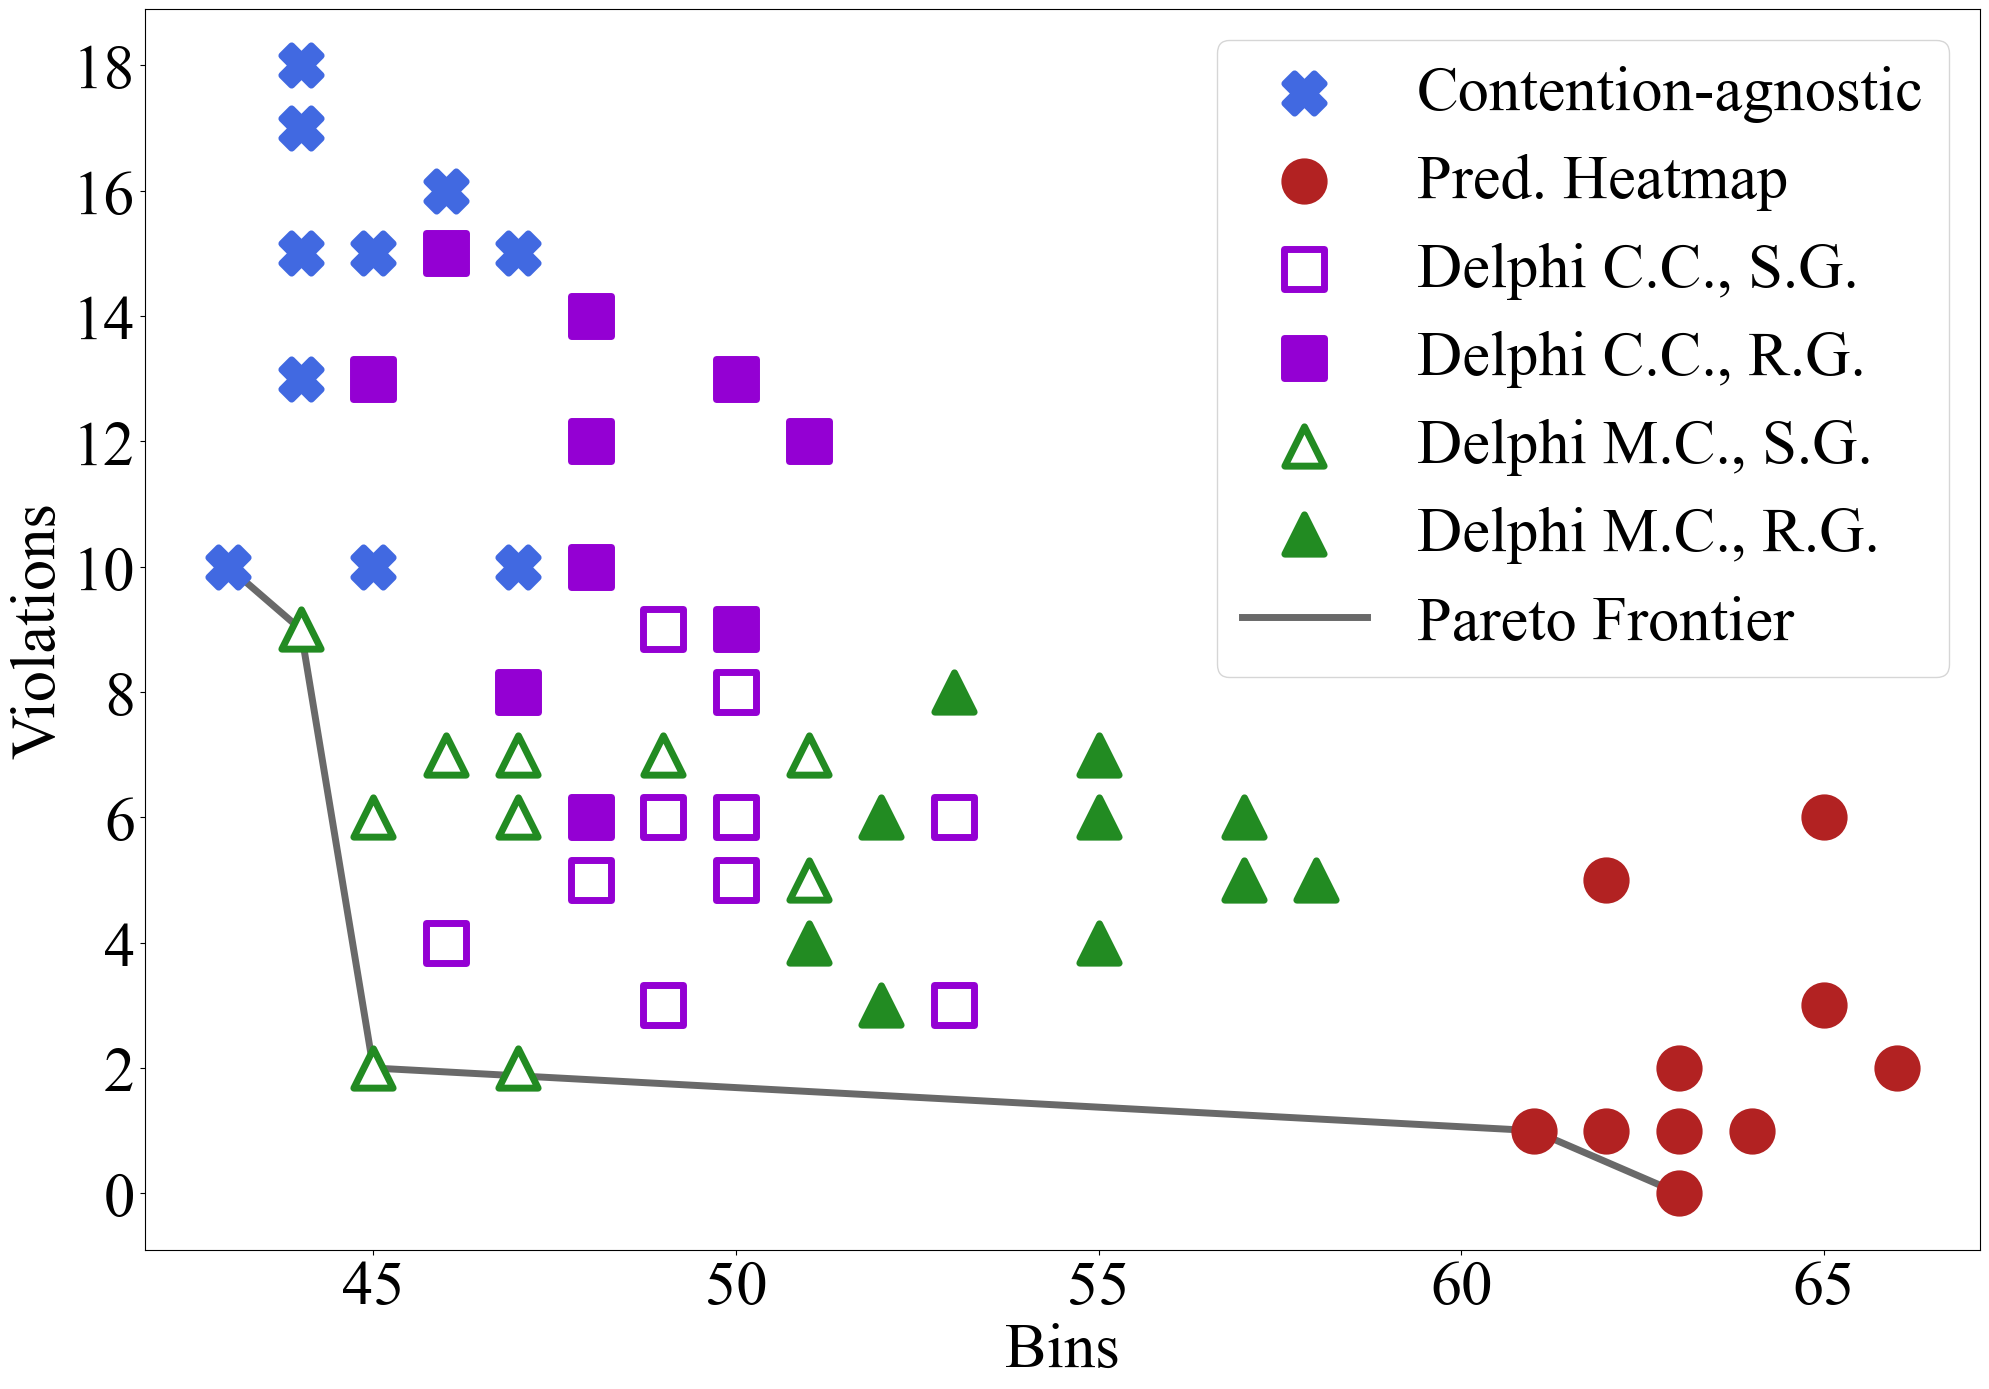

In [6]:
fig, ax = plt.subplots()
fig.set_size_inches(20, 14, forward=True)
x = df['bins'].values
y = df['violations'].values
algo = df.index.values

for i in range(len(x)):
    (alg, pred, cl, mode) = reverse[algo[i]].split('_')
    ax.scatter(x[i], y[i], marker=markers[alg][cl], color=colors[alg][cl][mode], edgecolors=edgecs[alg][cl], linewidth = linewidth, label = algo[i], s = 800)
ax.plot(sorted(efficient_points[:, 0], reverse = True), sorted(efficient_points[:, 1]), color='dimgrey', linewidth = linewidth, label='Pareto Frontier', zorder = -1)

start, end = ax.get_ylim()
print(start, end)

fsize = 45
fname = "Times New Roman"
plt.xlabel('Bins', fontsize = fsize, fontname = fname)
plt.ylabel('Violations', fontsize = fsize, fontname = fname)
#plt.title('Pareto Frontier', fontsize = fsize, fontname = fname)

loc = plticker.MultipleLocator(base=2.0)
ax.yaxis.set_major_locator(loc)

for tick in ax.xaxis.get_major_ticks():
    tick.label1.set_fontsize(fsize)
    tick.label1.set_fontname(fname)
for tick in ax.yaxis.get_major_ticks():
    tick.label1.set_fontsize(fsize)
    tick.label1.set_fontname(fname)

handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))
plt.legend(by_label.values(), by_label.keys(), prop={'family':fname, 'size':fsize})
plt.tight_layout()
plt.savefig('pareto.png')